# Standings Test
First we establish a valid oauth token below:

In [2]:
from yahoo_oauth import OAuth2
oauth = OAuth2(None, None, from_file='../oauth2.json')

[2019-09-24 10:01:08,893 DEBUG] [yahoo_oauth.yahoo_oauth.__init__] Checking 
[2019-09-24 10:01:08,897 DEBUG] [yahoo_oauth.yahoo_oauth.token_is_valid] ELAPSED TIME : 45366.520191669464
[2019-09-24 10:01:08,897 DEBUG] [yahoo_oauth.yahoo_oauth.token_is_valid] TOKEN HAS EXPIRED
[2019-09-24 10:01:08,898 DEBUG] [yahoo_oauth.yahoo_oauth.refresh_access_token] REFRESHING TOKEN


This will run more frequently - this will check if the token is valid, if not, refresh. Then, we can try to download info from yahoo.

[2019-09-24 10:17:36,906 DEBUG] [yahoo_oauth.yahoo_oauth.token_is_valid] ELAPSED TIME : 988.0066883563995
[2019-09-24 10:17:36,907 DEBUG] [yahoo_oauth.yahoo_oauth.token_is_valid] TOKEN IS STILL VALID


,Team Names,Wins,Losses,Ties,Cohort,mean,std,min,25%,50%,75%,max,Points For
1,Matthew Masison,3,0,0,27,139.406667,38.275237,97.96,122.40,146.84,160.13,173.42,418.22
2,Action Macklin,3,0,0,QG,133.500000,27.901634,109.96,118.09,126.22,145.27,164.32,400.50
3,I Eat Mop,3,0,0,30,131.340000,19.752985,111.06,121.75,132.44,141.48,150.52,394.02
4,Diehydrogen Monoxyde,3,0,0,29,130.653333,3.773080,127.38,128.59,129.80,132.29,134.78,391.96
5,Summer's Team,3,0,0,25,127.033333,17.691380,116.60,116.82,117.04,132.25,147.46,381.10
6,Haskin' For Trouble,2,1,0,23,136.513333,36.221818,94.92,124.21,153.50,157.31,161.12,409.54
7,Six Sigmas,2,1,0,25,132.200000,13.280858,118.62,125.72,132.82,138.99,145.16,396.60
8,Drew bLees,2,1,0,23,131.166667,33.146477,111.80,112.03,112.26,140.85,169.44,393.50
9,Rachel's Team,1,2,0,QG,128.880000,28.530426,95.94,120.42,144.90,145.35,145.80,386.64
10,Bobby's Team,1,2,0,21,121.573333,21.457459,107.40,109.23,111.06,128.66,146.26,364.72


Leagues
1    362.2900
2    352.5825
3    346.8750
Name: Actual, dtype: float64

Cohort
27    418.220000
29    371.850000
QG    362.653333
30    356.500000
23    354.715000
21    354.100000
25    353.325000
33    351.710000
24    337.620000
26    323.080000
32    289.000000
Name: Actual, dtype: float64

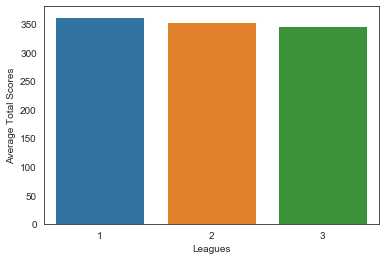

In [8]:
%matplotlib inline
from bs4 import BeautifulSoup
import xml.etree.ElementTree as et 
import pandas as pd 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_style("white")


if not oauth.token_is_valid():
    oauth.refresh_access_token()
    
df_cols = ["projected points"]
out_df = pd.DataFrame(columns = df_cols)

num_teams = 8

league_ids = [1118202, 1110495, 1112355]

team_name_list = []
dist_series = pd.Series()
series_total = pd.Series()
series_wins = pd.Series()
series_losses = pd.Series()
series_ties = pd.Series()

weeks = 3

for league_id in league_ids:
    for week in range(1, weeks+1):
        url = "https://fantasysports.yahooapis.com/fantasy/v2/league/nfl.l."+str(league_id)+"/scoreboard;week=" + str(week)
        # url = "https://fantasysports.yahooapis.com/fantasy/v2/league/nfl.l.1118202/standings"
        # probably migrate to scoreboard when there is data... but unsure
        # url = "https://fantasysports.yahooapis.com/fantasy/v2/league/nfl.l.854917/scoreboard"
        # https://fantasysports.yahooapis.com/fantasy/v2/team/223.l.431.t.1/matchups;weeks=1,5
        payload = ""
        response = oauth.session.get(url, params=payload)

        # we only want to process data if there's data to pass.
        if not response.status_code == 200:
            print("Status Code Not Valid")
            print(response.text)
        else:

        #   XML Samples which are searchable can be found here: https://developer.yahoo.com/fantasysports/guide/

            soup = BeautifulSoup(response.text, 'lxml')
        #     Remove new line formatting from html to prevent confusion
            clean = str(soup).replace('\n', '')
        #     print(clean)
        #     print(soup.prettify())

        #  Get team Names:
        #     select all name tags beneath team tags
            s_team_names = soup.select('team_projected_points total')
        #     extract the text from the entire tag
            s_team_names = list(map(lambda x: float(x.text), s_team_names))
    #         print(s_team_names)
        #     place that in a fancy little pandas series
            dist_series = dist_series.append(pd.Series(s_team_names), ignore_index=True)
    #         print(dist_series)

            s_total = soup.select('team_points total')
            s_total = list(map(lambda x: float(x.text), s_total))
            series_total = series_total.append(pd.Series(s_total), ignore_index=True)

            tn_l = soup.select('team name')
            tn_l = list(map(lambda x: x.text, tn_l))
            team_name_list+=tn_l
    url = "https://fantasysports.yahooapis.com/fantasy/v2/league/nfl.l."+ str(league_id) +"/standings"
    response = oauth.session.get(url)
    if not response.status_code == 200:
        print("Status Code 2nd request Not Valid")
        print(response.text)
    else:
        soup = BeautifulSoup(response.text, 'lxml')
#         print(soup.prettify())
        s_wl_index = soup.select('team name')
        s_wl_index = list(map(lambda x: x.text, s_wl_index))
#         wl_index.append(s_wl_index)

        s_wins = soup.select('wins')
        s_wins = list(map(lambda x: int(x.text), s_wins))
        series_wins = series_wins.append(pd.Series(s_wins, index=s_wl_index))

        s_losses = soup.select('losses')
        s_losses = list(map(lambda x: int(x.text), s_losses))
        series_losses = series_losses.append(pd.Series(s_losses, index=s_wl_index))

        s_ties = soup.select('ties')
        s_ties = list(map(lambda x: int(x.text), s_ties))
        series_ties = series_ties.append(pd.Series(s_ties, index=s_wl_index))

cohorts = pd.read_csv('../cohorts.csv', index_col=0)
leagues = pd.read_csv('../leagues.csv', index_col=0)

data = {"Actual": series_total, "Projected": dist_series, "Team Names": team_name_list}
final_df = pd.DataFrame(data).set_index("Team Names")

final_df['Wins'] = series_wins
final_df['Losses'] = series_losses
final_df['Ties'] = series_ties

df1 = final_df.groupby('Team Names')['Actual'].describe().drop("count", axis=1)
df2 = final_df.groupby('Team Names')['Actual'].sum()

df1["Points For"] = df2

df1['Wins'] = series_wins
df1['Losses'] = series_losses
df1['Ties'] = series_ties
df1['Cohort'] = cohorts
df1_cols = df1.columns.tolist()
df1_cols = df1_cols[-4:] + df1_cols[:-4]

df1 = df1[df1_cols]

df1 = df1.sort_values(by=['Wins',"Points For"], ascending=[False,False])
df1 = df1.reset_index()
df1.index +=1


display(df1)
# The order is different int this call (by standing), so index must be assigned in the series then matched up with the final df
df2 = df2.to_frame()
df3 = df2.copy()

df3['Leagues'] = leagues
df3 = df3.groupby('Leagues')['Actual'].mean().sort_values(ascending=False)
display(df3)
sns.barplot(x=df3.index, y=df3.values).set(ylabel="Average Total Scores")

df2['Cohort'] = cohorts
df2 = df2.groupby('Cohort')['Actual'].mean().sort_values(ascending=False)
display(df2)
# sns.barplot(x=df2.index, y=df2.values).set(ylabel="Average Total Scores")


# sns.boxplot(data=final_df, order=["Projected", "Actual"])
# sns.kdeplot(final_df.projected, final_df.actual)
# sns.distplot(dist_series, bins=12);
# sns.jointplot(data=final_df, y="Projected", x="Actual", kind="reg", label="Team Names")
# final_df.corr(method="pearson")